In [484]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [485]:
ap_data=pd.read_csv('application_data.csv')

In [486]:
ap_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [487]:
pre_ap_data=pd.read_csv('previous_application.csv')

In [438]:
pre_ap_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [488]:
df = pd.merge(ap_data,pre_ap_data, on="SK_ID_CURR")


In [489]:
df = df.drop_duplicates(subset=['SK_ID_CURR'],ignore_index=True)
df.columns = df.columns.str.replace("TARGET", "Default")

In [490]:
df

,SK_ID_CURR,Default,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Consumer electronics,18.0,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291052,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Connectivity,8.0,high,POS mobile with interest,365243.0,-210.0,0.0,-30.0,-25.0,0.0
291053,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,Consumer electronics,6.0,low_normal,POS household without interest,365243.0,-2466.0,-2316.0,-2316.0,-2311.0,1.0
291054,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Connectivity,6.0,high,POS mobile with interest,365243.0,-1866.0,-1716.0,-1716.0,-1712.0,0.0
291055,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Consumer electronics,16.0,low_normal,POS household with interest,365243.0,-247.0,203.0,365243.0,365243.0,1.0


In [491]:

def drop_columns(df,dropcolumns):
    
    for i in df.columns:
        if i in dropcolumns:
            df=df.drop(i, axis=1)
            
    return df
dropcolumns=['SK_ID_CURR','NAME_TYPE_SUITE_x','FLAG_OWN_REALTY','AMT_ANNUITY_x','DAYS_REGISTRATION'
'DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START_x',
'HOUR_APPR_PROCESS_START_x','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
'COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE',
'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE',
'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',
'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI',
'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','TOTALAREA_MODE',
'OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','SK_ID_PREV','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE_y',
'WEEKDAY_APPR_PROCESS_START_y','NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY',
'RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE_y','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','CNT_PAYMENT','PRODUCT_COMBINATION',
'SELLERPLACE_AREA','PRODUCT_COMBINATION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE','DAYS_TERMINATION','HOUSETYPE_MODE','DAYS_ID_PUBLISH','OCCUPATION_TYPE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE',
'AMT_ANNUITY_y','HOUR_APPR_PROCESS_START_y','WALLSMATERIAL_MODE','DEF_30_CNT_SOCIAL_CIRCLE']
df=drop_columns(df,dropcolumns)
df

,Default,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL
0,1,Cash loans,M,N,0,202500.0,406597.5,351000.0,Working,Secondary / secondary special,...,Y,XAP,Approved,-606,XNA,XAP,New,Vehicles,low_normal,0.0
1,0,Cash loans,F,N,0,270000.0,1293502.5,1129500.0,State servant,Higher education,...,Y,XNA,Approved,-746,XNA,XAP,Repeater,XNA,low_normal,1.0
2,0,Revolving loans,M,Y,0,67500.0,135000.0,135000.0,Working,Secondary / secondary special,...,Y,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,middle,0.0
3,0,Cash loans,F,N,0,135000.0,312682.5,297000.0,Working,Secondary / secondary special,...,Y,XNA,Approved,-181,Cash through the bank,XAP,Repeater,XNA,low_normal,0.0
4,0,Cash loans,M,N,0,121500.0,513000.0,513000.0,Working,Secondary / secondary special,...,Y,XNA,Approved,-865,Cash through the bank,XAP,Repeater,XNA,high,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291052,0,Cash loans,M,N,0,157500.0,254700.0,225000.0,Working,Secondary / secondary special,...,Y,XAP,Approved,-273,Cash through the bank,XAP,New,Mobile,high,0.0
291053,0,Cash loans,F,N,0,72000.0,269550.0,225000.0,Pensioner,Secondary / secondary special,...,Y,XAP,Approved,-2497,Cash through the bank,XAP,New,Consumer Electronics,low_normal,1.0
291054,0,Cash loans,F,N,0,153000.0,677664.0,585000.0,Working,Higher education,...,Y,XAP,Approved,-1909,Cash through the bank,XAP,Refreshed,Mobile,high,0.0
291055,1,Cash loans,F,N,0,171000.0,370107.0,319500.0,Commercial associate,Secondary / secondary special,...,Y,XAP,Approved,-277,Cash through the bank,XAP,Repeater,Computers,low_normal,1.0


In [492]:
df['Submission_documents']=df.iloc[:,21:41].sum(axis=1)
df.drop(df.iloc[:,21:41],axis=1,inplace=True)
df['DAYS_DECISION']=abs(df['DAYS_DECISION'])
df['NFLAG_INSURED_ON_APPROVAL']=df['NFLAG_INSURED_ON_APPROVAL'].fillna(df['NFLAG_INSURED_ON_APPROVAL'].mode()[0])
df['AMT_REQ_CREDIT_BUREAU_HOUR']=df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].median())
df['AMT_REQ_CREDIT_BUREAU_DAY']=df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df['AMT_REQ_CREDIT_BUREAU_DAY'].median())
df['AMT_REQ_CREDIT_BUREAU_WEEK']=df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df['AMT_REQ_CREDIT_BUREAU_WEEK'].median())
df['AMT_REQ_CREDIT_BUREAU_MON']=df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].median())
df['AMT_REQ_CREDIT_BUREAU_QRT']=df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].median())
df['AMT_REQ_CREDIT_BUREAU_YEAR']=df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].median())
df['AMT_GOODS_PRICE_x']=df['AMT_GOODS_PRICE_x'].fillna(df['AMT_GOODS_PRICE_x'].mean())


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291057 entries, 0 to 291056
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Default                      291057 non-null  int64  
 1   NAME_CONTRACT_TYPE_x         291057 non-null  object 
 2   CODE_GENDER                  291057 non-null  object 
 3   FLAG_OWN_CAR                 291057 non-null  object 
 4   CNT_CHILDREN                 291057 non-null  int64  
 5   AMT_INCOME_TOTAL             291057 non-null  float64
 6   AMT_CREDIT_x                 291057 non-null  float64
 7   AMT_GOODS_PRICE_x            291057 non-null  float64
 8   NAME_INCOME_TYPE             291057 non-null  object 
 9   NAME_EDUCATION_TYPE          291057 non-null  object 
 10  NAME_FAMILY_STATUS           291057 non-null  object 
 11  NAME_HOUSING_TYPE            291057 non-null  object 
 12  REGION_POPULATION_RELATIVE   291057 non-null  float64
 13 

In [494]:
df['Total_Enquiries']=df.iloc[:,21:27].sum(axis=1)
df.drop(df.iloc[:,21:27],axis=1,inplace=True)


In [495]:
df['DEF_60_CNT_SOCIAL_CIRCLE']=df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].median())
df['inco_loan']=round(df['AMT_INCOME_TOTAL']/df['AMT_CREDIT_x'],2)
df['Age']=abs(round(df['DAYS_BIRTH']/365))
df.drop('DAYS_BIRTH',axis=1,inplace=True)


In [130]:
age_de=df.groupby(['Default','Age']).size().reset_index(name='Count')
age_de_analysis=px.line(age_de, x= 'Age',y='Count',color='Default',title='Age_Default_Analysis')
age_de_analysis

In [131]:
count=df.groupby('CODE_GENDER').size().reset_index(name='Count')
count_an=px.bar(count,x='CODE_GENDER',y='Count',color='CODE_GENDER',title='Gender_Count',labels={'CODE_GENDER':'Gender'})
count_an

In [132]:
gender_de=df.groupby(['Default','CODE_GENDER']).size().reset_index(name='Count')
gender_de_analysis=px.bar(gender_de, x= 'CODE_GENDER',y='Count',color='Default',title='Geder_Default_Analysis',labels={'CODE_GENDER':'Gender'})
gender_de_analysis

In [133]:
emp_de=df.groupby(['ORGANIZATION_TYPE','Default']).size().sort_values(ascending=False).reset_index(name='Count')
emp_de_analysis=px.bar(emp_de, x= 'ORGANIZATION_TYPE',y='Count',color='Default',width=10000,title='Employment_Default_Analysis')
emp_de_analysis

In [134]:
edu_de=df.groupby(['NAME_EDUCATION_TYPE','Default']).size().sort_values(ascending=False).reset_index(name='Count')
edu_de_analysis=px.bar(edu_de, x= 'NAME_EDUCATION_TYPE',y='Count',color='Default',title='Employment_Default_Analysis',labels={'NAME_EDUCATION_TYPE':'Education Type'})
edu_de_analysis.show()

In [135]:
fa_sta=df.groupby(['NAME_FAMILY_STATUS','Default']).size().sort_values(ascending=False).reset_index(name='Count')
fa_sta_de_analysis=px.bar(fa_sta, x= 'NAME_FAMILY_STATUS',y='Count',color='Default',title='Family_status_Default_Analysis',labels={'NAME_FAMILY_STATUS':'Family Status'})
fa_sta_de_analysis

In [136]:
df.columns

Index(['Default', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'ORGANIZATION_TYPE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_CONTRACT_TYPE_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_YIELD_GROUP', 'NFLAG_INSURED_ON_APPROVAL', 'Submission_documents',
       'Total_Enquiries', 'inco_loan', 'Age'],
      dtype='object')

array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

In [197]:
df['FLAG_LAST_APPL_PER_CONTRACT'].unique()

array(['Y', 'N'], dtype=object)

In [187]:
inc_debt_de=df.groupby(['inco_loan','Default']).size().sort_values(ascending=False).reset_index(name='Count')
inc_debt_de

,inco_loan,Default,Count
0,0.17,0,8126
1,0.20,0,7851
2,0.33,0,7418
3,0.25,0,7188
4,0.18,0,7132
...,...,...,...
689,3.24,1,1
690,3.25,1,1
691,3.33,1,1
692,3.34,1,1


In [252]:
sta_income=df.groupby(['AMT_INCOME_TOTAL','NAME_CONTRACT_STATUS']).size().sort_values(ascending=False).reset_index(name='Count')
sta_income

,AMT_INCOME_TOTAL,NAME_CONTRACT_STATUS,Count
0,135000.0,Approved,25841
1,112500.0,Approved,22726
2,157500.0,Approved,18861
3,180000.0,Approved,17335
4,90000.0,Approved,16673
...,...,...,...
2741,179100.0,Canceled,1
2742,93942.0,Refused,1
2743,178650.0,Refused,1
2744,94027.5,Approved,1


In [255]:
sta_income_analysis=px.line(sta_income, x= 'NAME_CONTRACT_STATUS',y='Count',color='AMT_INCOME_TOTAL',title='income_Status_Analysis')
sta_income_analysis

In [264]:
enq_Default=df.groupby(['Total_Enquiries','Default']).size().sort_values(ascending=False).reset_index(name='Count')
enq_Default_analysis=px.bar(enq_Default,x='Total_Enquiries',y='Count',width=10000,color='Default',title='Enquiry_default_analysis')
enq_Default_analysis

In [279]:
lo_type_default=df.groupby(['NAME_CONTRACT_TYPE_x','Default']).size().sort_values(ascending=False).reset_index(name='Count')

In [280]:
lo_type_default

,NAME_CONTRACT_TYPE_x,Default,Count
0,Cash loans,0,242302
1,Revolving loans,0,24910
2,Cash loans,1,22366
3,Revolving loans,1,1479


In [283]:
fig = px.bar(lo_type_default, x='NAME_CONTRACT_TYPE_x',y='Count',color='Default',labels={'NAME_CONTRACT_TYPE_x':'Loan_type'})
fig.show()

In [284]:
lo_type_sta=df.groupby(['NAME_CONTRACT_TYPE_x','NAME_CONTRACT_STATUS']).size().sort_values(ascending=False).reset_index(name='Count')

In [285]:
lo_type_sta

,NAME_CONTRACT_TYPE_x,NAME_CONTRACT_STATUS,Count
0,Cash loans,Approved,198909
1,Cash loans,Canceled,32317
2,Cash loans,Refused,29461
3,Revolving loans,Approved,20714
4,Cash loans,Unused offer,3981
5,Revolving loans,Canceled,2747
6,Revolving loans,Refused,2487
7,Revolving loans,Unused offer,441


In [287]:
lo_type_sta_analysis=px.line(lo_type_sta, x= 'NAME_CONTRACT_STATUS',y='Count',color='NAME_CONTRACT_TYPE_x',title='Loan_type_Status_Analysis',labels={'NAME_CONTRACT_STATUS':'Status of loan'})
lo_type_sta_analysis

In [288]:
sta_default=df.groupby(['NAME_CONTRACT_STATUS','Default']).size().sort_values(ascending=False).reset_index(name='Count')

,NAME_CONTRACT_STATUS,Default,Count
0,Approved,0,203001
1,Canceled,0,31984
2,Refused,0,28174
3,Approved,1,16622
4,Unused offer,0,4053
5,Refused,1,3774
6,Canceled,1,3080
7,Unused offer,1,369


In [291]:
sta_default_analysis=px.line(sta_default, x= 'NAME_CONTRACT_STATUS',y='Count',color='Default',title='Loan_type_Status_Analysis',labels={'NAME_CONTRACT_STATUS':'Status of loan'})
sta_default_analysis                                                                                                                                     

In [293]:
# conversions_by_marital_status_df = pd.pivot_table(lo_type_default, values='Count', index='NAME_CONTRACT_TYPE_x', columns='Default') 
# conversions_by_marital_status_df 

Default,0,1
NAME_CONTRACT_TYPE_x,,
Cash loans,242302,22366
Revolving loans,24910,1479


In [ ]:
# conversions_by_marital_status_df.plot(
#     kind='pie',
#     figsize=(15, 7),
#     startangle=90,
#     subplots=True,
#     autopct=lambda x: '%0.1f%%' % x
# )

# plt.show()

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291005 entries, 0 to 291056
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Default                      291005 non-null  object 
 1   NAME_CONTRACT_TYPE_x         291005 non-null  object 
 2   CODE_GENDER                  291005 non-null  object 
 3   FLAG_OWN_CAR                 291005 non-null  object 
 4   CNT_CHILDREN                 291005 non-null  int64  
 5   AMT_INCOME_TOTAL             291005 non-null  float64
 6   AMT_CREDIT_x                 291005 non-null  float64
 7   AMT_GOODS_PRICE_x            290739 non-null  float64
 8   NAME_INCOME_TYPE             291005 non-null  object 
 9   NAME_EDUCATION_TYPE          291005 non-null  object 
 10  NAME_FAMILY_STATUS           291005 non-null  object 
 11  NAME_HOUSING_TYPE            291005 non-null  object 
 12  REGION_POPULATION_RELATIVE   291005 non-null  float64
 13 

In [496]:
df = df.drop(df[df['CODE_GENDER'] == 'XNA'].index)
df= df.drop(df[df['NAME_CONTRACT_TYPE_y'] == 'XNA'].index)

In [302]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# newdf = df.select_dtypes(include=numerics)

In [497]:
df['Default']=df['Default'].astype(str)
df['FLAG_MOBIL']=df['FLAG_MOBIL'].astype(str)
df['FLAG_EMAIL']=df['FLAG_EMAIL'].astype(str)
df.drop('NAME_CASH_LOAN_PURPOSE',axis=1,inplace=True)
df['DAYS_EMPLOYED']=abs(df['DAYS_EMPLOYED'])
df['DAYS_REGISTRATION']=abs(df['DAYS_REGISTRATION'])

In [498]:
df.skew()

/var/folders/3t/pqh4_s6s6wv5gtzhmb5s8qn80000gn/T/ipykernel_53294/1665899112.py:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Default                         3.049253
CNT_CHILDREN                    1.965279
AMT_INCOME_TOTAL              398.375765
AMT_CREDIT_x                    1.143651
AMT_GOODS_PRICE_x               1.247032
REGION_POPULATION_RELATIVE      1.471010
DAYS_EMPLOYED                   1.658777
DAYS_REGISTRATION               0.588671
FLAG_MOBIL                      0.000000
FLAG_EMAIL                      3.776610
REGION_RATING_CLIENT            0.102182
DEF_60_CNT_SOCIAL_CIRCLE        5.294794
AMT_APPLICATION                 3.998867
AMT_CREDIT_y                    3.819794
DAYS_DECISION                   0.980463
NFLAG_INSURED_ON_APPROVAL       1.549306
Submission_documents           -1.578801
Total_Enquiries                 7.632823
inco_loan                     226.120278
Age                             0.114445
dtype: float64

In [499]:
df['AMT_INCOME_TOTAL']=np.log(df['AMT_INCOME_TOTAL'])
df['AMT_CREDIT_x']=np.log(df['AMT_CREDIT_x'])
df['AMT_GOODS_PRICE_x']=np.log(df['AMT_GOODS_PRICE_x'])
df['DAYS_DECISION']=np.log(df['DAYS_DECISION'])
df['inco_loan']=np.log(df['inco_loan'])

In [501]:
df['REGION_POPULATION_RELATIVE']=np.log([x+1 for x in df['REGION_POPULATION_RELATIVE']])
df['DAYS_EMPLOYED']=np.log([x+1 for x in df['DAYS_EMPLOYED']])
df['DEF_60_CNT_SOCIAL_CIRCLE']=np.log([x+1 for x in df['DEF_60_CNT_SOCIAL_CIRCLE']])
df['AMT_APPLICATION']=np.log([x+1 for x in df['AMT_APPLICATION']])
df['AMT_CREDIT_y']=np.log([x+1 for x in df['AMT_CREDIT_y']])
df['NFLAG_INSURED_ON_APPROVAL']=np.log([x+1 for x in df['NFLAG_INSURED_ON_APPROVAL']])
df['Submission_documents']=np.log([x+1 for x in df['Submission_documents']])
df['Total_Enquiries']=np.log([x+1 for x in df['Total_Enquiries']])


In [505]:
df['CNT_CHILDREN']=np.log([x+1 for x in df['CNT_CHILDREN']])

In [476]:
df['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()

0

In [477]:
df[''].unique()

array([  637,  1188,   225, ..., 12971, 11084,  8694])

In [506]:
df.skew()

/var/folders/3t/pqh4_s6s6wv5gtzhmb5s8qn80000gn/T/ipykernel_53294/1665899112.py:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Default                       3.049253
CNT_CHILDREN                  1.031175
AMT_INCOME_TOTAL              0.122851
AMT_CREDIT_x                 -0.356513
AMT_GOODS_PRICE_x            -0.316003
REGION_POPULATION_RELATIVE    1.410110
DAYS_EMPLOYED                 1.010111
DAYS_REGISTRATION             0.588671
FLAG_MOBIL                    0.000000
FLAG_EMAIL                    3.776610
REGION_RATING_CLIENT          0.102182
DEF_60_CNT_SOCIAL_CIRCLE      3.391874
AMT_APPLICATION              -1.675340
AMT_CREDIT_y                 -1.962786
DAYS_DECISION                -1.009543
NFLAG_INSURED_ON_APPROVAL     1.549306
Submission_documents         -2.433037
Total_Enquiries              -0.242734
inco_loan                     0.253502
Age                           0.114445
dtype: float64

In [507]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 


In [508]:
df['NAME_CONTRACT_TYPE_x']=df['NAME_CONTRACT_TYPE_x'].map({'Cash loans':1,'Revolving loans':0})
df['CODE_GENDER']=df['CODE_GENDER'].map({'M':1,'F':0})
df['FLAG_OWN_CAR']=df['FLAG_OWN_CAR'].map({'Y':1,'N':0})
df['NAME_INCOME_TYPE']=le.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE']=le.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS']=le.fit_transform(df['NAME_FAMILY_STATUS'])
df=pd.get_dummies(data=df,columns=['NAME_HOUSING_TYPE'])
df=pd.get_dummies(data=df,columns=['ORGANIZATION_TYPE'])
df['NAME_CONTRACT_TYPE_y']=le.fit_transform(df['NAME_CONTRACT_TYPE_y'])
df['FLAG_LAST_APPL_PER_CONTRACT']=df['FLAG_LAST_APPL_PER_CONTRACT'].map({'Y':1,'N':0})
df['NAME_CONTRACT_STATUS']=le.fit_transform(df['NAME_CONTRACT_STATUS'])
df=pd.get_dummies(data=df,columns=['NAME_PAYMENT_TYPE'])
df=pd.get_dummies(data=df,columns=['CODE_REJECT_REASON'])
df['NAME_CLIENT_TYPE']=le.fit_transform(df['NAME_CLIENT_TYPE'])
df=pd.get_dummies(data=df,columns=['NAME_GOODS_CATEGORY'])
df['NAME_YIELD_GROUP']=le.fit_transform(df['NAME_YIELD_GROUP'])

In [509]:
df

,Default,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA
0,1,1,1,0,0.0,12.218495,12.915579,12.768542,6,4,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0.0,12.506177,14.072864,13.937286,3,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,1,0.0,11.119883,11.813030,11.813030,6,4,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0.0,11.813030,12.652944,12.601487,6,4,...,0,0,0,0,0,0,0,0,0,1
4,0,1,1,0,0.0,11.707670,13.148031,13.148031,6,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291052,0,1,1,0,0.0,11.967181,12.447842,12.323856,6,4,...,0,1,0,0,0,0,0,0,0,0
291053,0,1,0,0,0.0,11.184421,12.504509,12.323856,2,4,...,0,0,0,0,0,0,0,0,0,0
291054,0,1,0,0,0.0,11.938193,13.426407,13.279367,6,1,...,0,1,0,0,0,0,0,0,0,0
291055,1,1,0,0,0.0,12.049419,12.821547,12.674513,0,4,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Default'>

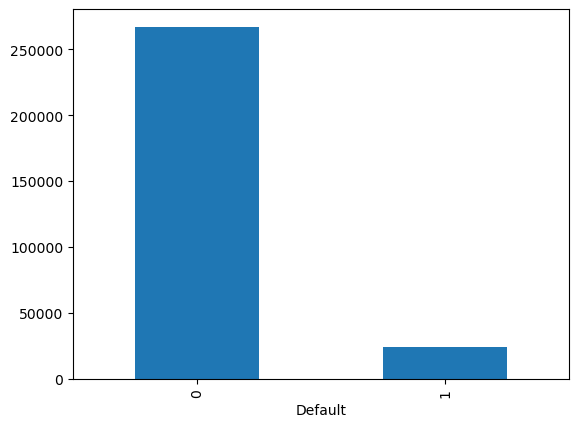

In [383]:
GroupedData=df.groupby('Default').size()
GroupedData.plot.bar()

In [510]:
df.isnull().sum()[0:8]

Default                 0
NAME_CONTRACT_TYPE_x    0
CODE_GENDER             0
FLAG_OWN_CAR            0
CNT_CHILDREN            0
AMT_INCOME_TOTAL        0
AMT_CREDIT_x            0
AMT_GOODS_PRICE_x       0
dtype: int64

Feature: 0, Score: 0.00290
Feature: 1, Score: 0.00828
Feature: 2, Score: 0.00972
Feature: 3, Score: 0.01707
Feature: 4, Score: 0.05040
Feature: 5, Score: 0.05954
Feature: 6, Score: 0.04953
Feature: 7, Score: 0.01081
Feature: 8, Score: 0.01091
Feature: 9, Score: 0.02191
Feature: 10, Score: 0.05310
Feature: 11, Score: 0.06279
Feature: 12, Score: 0.06799
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00498
Feature: 15, Score: 0.01108
Feature: 16, Score: 0.00970
Feature: 17, Score: 0.00813
Feature: 18, Score: 0.05075
Feature: 19, Score: 0.05408
Feature: 20, Score: 0.00046
Feature: 21, Score: 0.00574
Feature: 22, Score: 0.06678
Feature: 23, Score: 0.01374
Feature: 24, Score: 0.01752
Feature: 25, Score: 0.00668
Feature: 26, Score: 0.00460
Feature: 27, Score: 0.03642
Feature: 28, Score: 0.05667
Feature: 29, Score: 0.05400
Feature: 30, Score: 0.00080
Feature: 31, Score: 0.00588
Feature: 32, Score: 0.00337
Feature: 33, Score: 0.00125
Feature: 34, Score: 0.00260
Feature: 35, Score: 0.00400
Fe

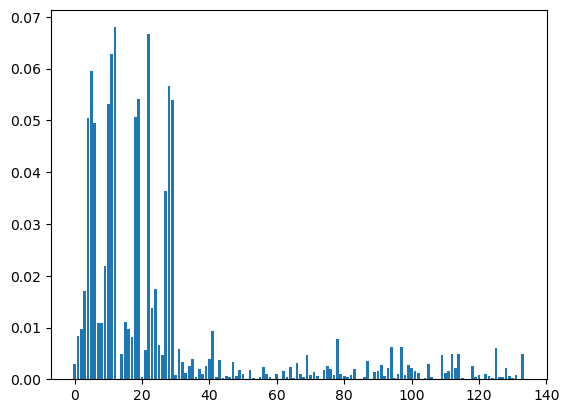

In [420]:

# from sklearn.ensemble import RandomForestClassifier
# from matplotlib import pyplot
# # define dataset
# X=df.drop('Default',axis=1)
# y=df['Default']
# # define the model
# model = RandomForestClassifier()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()


In [511]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,recall_score,f1_score,accuracy_score,precision_score

In [512]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [513]:
mysteps = [('ss',StandardScaler()),('rus',RandomUnderSampler(random_state = 1)),('lr',LogisticRegression(solver='saga'))]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train,y_train)


/Users/xaviersavarimuthu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Pipeline(steps=[('ss', StandardScaler()),
                ('rus', RandomUnderSampler(random_state=1)),
                ('lr', LogisticRegression(solver='saga'))])

In [514]:
tr_xtest=m_pipe['ss'].transform(x_test)

In [515]:
predict_lr=m_pipe['lr'].predict(tr_xtest)

In [516]:
recall_lr=recall_score(y_test,predict_lr,pos_label='1')
recall_lr

0.6268093140339837

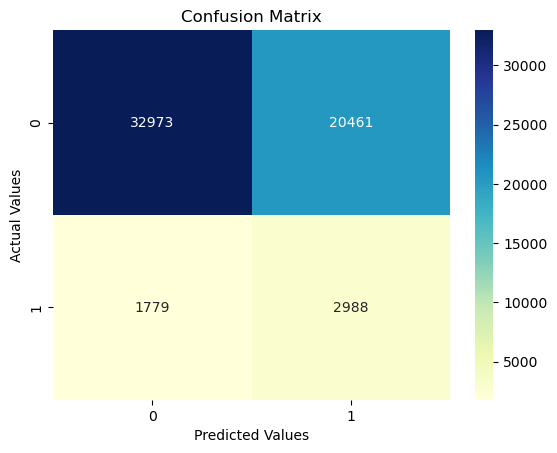

In [517]:
cm=confusion_matrix(y_test,predict_lr)
cm_matrix = pd.DataFrame(data=cm, columns=['0','1'],
                        index=['0','1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [518]:
mysteps = [('ss',StandardScaler()),('rus',RandomUnderSampler(random_state = 1)),('svm', SVC(kernel = 'rbf'))]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('rus', RandomUnderSampler(random_state=1)), ('svm', SVC())])

In [519]:
tr_xtest=m_pipe['ss'].transform(x_test)

In [ ]:
predict_svm=m_pipe['svm'].predict(tr_xtest)


In [ ]:
recall_score(y_test,predict_svm,pos_label='1')

In [ ]:
cm=confusion_matrix(y_test,predict_svm)
cm_matrix = pd.DataFrame(data=cm,columns=['No','Yes'], 
                         index=['No','Yes'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
mysteps = [('rus',RandomUnderSampler(random_state = 1)),('rf',RandomForestClassifier())]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train, y_train

In [ ]:
pre_rf=m_pipe['rf'].predict(x_test)

In [ ]:
re_score=recall_score(y_test,pre_rf,pos_label='Yes')
re_score


In [ ]:
cm=confusion_matrix(y_test,pre_rf)
cm_matrix = pd.DataFrame(data=cm, columns=['0','1'],
                        index=['0','1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()